In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Training Machine Learning/Logistic_Regression/churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [3]:
data = data.dropna(how='all',axis = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [4]:
data['churn'].value_counts()/len(data)
# The data is imbalanced

0    0.806317
1    0.193683
Name: churn, dtype: float64

In [15]:
X = data.drop(columns = ['churn','customer_id'])
Y = data['churn']

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(scaled_X , Y , train_size = 0.80,)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

# Model Building , Predictions and odds ratios

In [18]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced')

In [19]:
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_test)               # predicting class
predicted_probabilities = classifier.predict_proba(x_test)  # predicting probabilities 

In [21]:
predicted_values,predicted_probabilities

(array([0, 0, 0, ..., 1, 0, 0]), array([[0.61078321, 0.38921679],
        [0.65909261, 0.34090739],
        [0.6126382 , 0.3873618 ],
        ...,
        [0.45846514, 0.54153486],
        [0.53407972, 0.46592028],
        [0.5468498 , 0.4531502 ]]))

In [22]:
# Accuracy
classifier.score(x_test,y_test)

0.7154508382419574

In [23]:
# Presicion
from sklearn.metrics import precision_score
Precision = precision_score(y_test,predicted_values)
Precision

0.3703457446808511

In [25]:
# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test,predicted_values)
Recall

0.6431870669745958

In [26]:
# manually calculating the F1 score

F1 = 2/((1/Precision)+(1/Recall))
F1

0.470042194092827

In [28]:
# using predefined functions to calculate the F1 score
from sklearn.metrics import f1_score

F1 = f1_score(y_test,predicted_values)
F1

0.470042194092827

In [29]:
# we can use another metric evaluation library from sklearn
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision,recall,f1_score,support = PRF_summary(y_test, predicted_values)

In [30]:
precision

array([0.89381443, 0.37034574])

In [31]:
recall

array([0.73308906, 0.64318707])

In [33]:
f1_score

array([0.80551254, 0.47004219])

In [35]:
support  # number of instances for class 0 and class 1

array([3548,  866])

In [37]:
from sklearn.metrics import classification_report
k = classification_report(y_test,predicted_values)
print(k)
# the classifiction report is for mere evaluating purposes we cannot use them later

              precision    recall  f1-score   support

           0       0.89      0.73      0.81      3548
           1       0.37      0.64      0.47       866

    accuracy                           0.72      4414
   macro avg       0.63      0.69      0.64      4414
weighted avg       0.79      0.72      0.74      4414



In [44]:
# Gathering all Precision/Recall score for every threshold between probabilities 0 and 1
from sklearn.metrics import precision_recall_curve
precision_points , recall_points , threshold_points = precision_recall_curve(y_test,predicted_probabilities[:,1])
precision_points.shape , recall_points.shape , threshold_points.shape

((4413,), (4413,), (4412,))

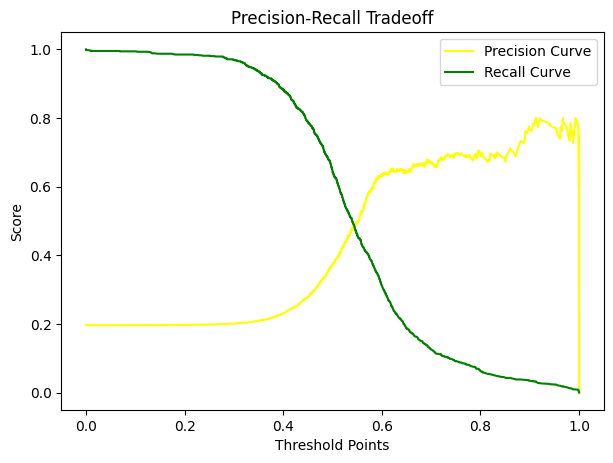

In [50]:
plt.figure(dpi =100 , figsize=(7,5))
plt.plot(threshold_points,precision_points[:-1],color='yellow',label='Precision Curve')
plt.plot(threshold_points,recall_points[:-1],color = 'green',label = 'Recall Curve')
plt.xlabel('Threshold Points')
plt.ylabel('Score')
plt.title('Precision-Recall Tradeoff')
plt.legend()
plt.show()

From the above graph the intersection 0.55 can be considered as Good threshold point

# AUC-ROC Curve

In [51]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr , tpr , threshold = roc_curve(y_test , predicted_probabilities[:,1])

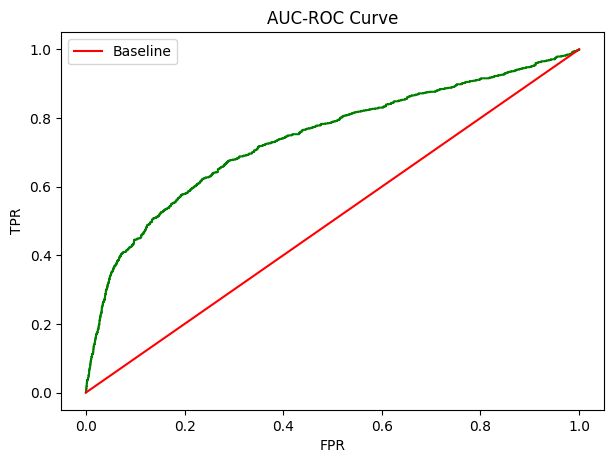

0.7389099281122502

In [57]:
plt.figure(dpi = 100 , figsize=(7,5))
plt.plot(fpr,tpr,color = 'green')
plt.plot([0,1],[0,1],color='red',label='Baseline')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()
roc_auc_score(y_test,predicted_probabilities[:,1])

Coefficient Plot

In [58]:
# arranging the values
c = classifier.coef_.reshape(-1)
x = X.columns

coefficient_plot = pd.DataFrame({'Coefficients':c,
                                'variables':x})

#sorting the values
coefficient_plot.sort_values(by='Coefficients',inplace = True)
coefficient_plot.head()

,Coefficients,variables
9,-2.200400,current_balance
13,-0.335520,current_month_credit
14,-0.186192,previous_month_credit
0,-0.179884,vintage
8,-0.135868,days_since_last_transaction


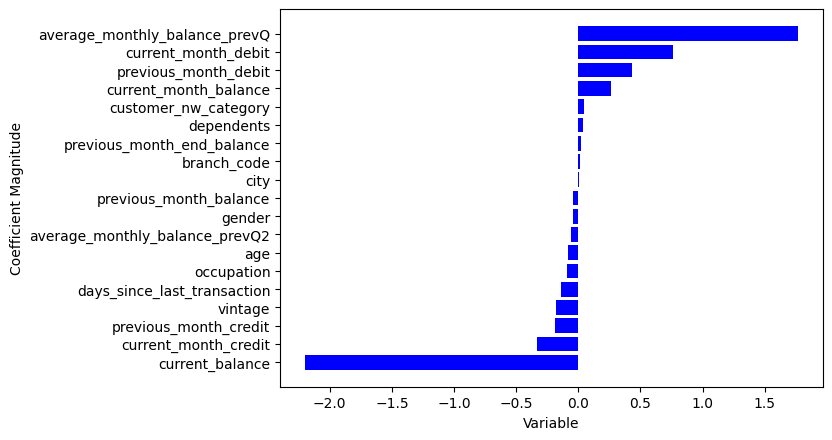

In [59]:
plt.figure(dpi = 100 , figsize=(7,5))
plt.barh(coefficient_plot['variables'],coefficient_plot['Coefficients'],color = 'blue')
plt.xlabel('Variable')
plt.ylabel('Coefficient Magnitude')
plt.show()